In [2]:
import os
import pandas as pd
import numpy as np
import json
#need pip install langcodes
# and pip install language_data
from langcodes import *
import matplotlib.pyplot as plt
import pycountry
import sys
sys.path.append('./helpers_python')
from helpers import *
import pickle
from matplotlib.gridspec import GridSpec

%load_ext autoreload
%autoreload 2

In [ ]:
df_cen = load_data()

## Basic commands to understand better the data 
There are 39 features that are listed below.

We can also see that there are only 23081 out of 41727 that are unique.
In total there are 41727 rows, in which there are only 23081 unique `text`, and 27960 unique `text&timestamp&withheld_in_countries&lang`.

In [3]:
print(len(df_cen.columns))
print(df_cen.columns)
print(df_cen.dtypes)
features_bool = ['truncated', 'is_quote_status', 'favorited', 'retweeted']
features_count = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
features_dates = ['created_at', 'timestamp_ms']
features_quoted = ['quoted_status_id', 'quoted_status_id_str','quoted_status', 'quoted_status_permalink']

39
Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'is_quote_status',
       'extended_tweet', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level',
       'lang', 'timestamp_ms', 'linked', 'display_text_range',
       'withheld_in_countries', 'extended_entities', 'possibly_sensitive',
       'retweeted_status', 'withheld_copyright'],
      dtype='object')
created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                     int64
text                                      object
source                                    ob

In [4]:
df_cen.iloc[:5,:20].head(5)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink
1,2021-02-26 10:48:35+00:00,1365252415444946945,1365252415444946944,#Balakot \nPak Army is our pride ❤️👍 https://t...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 966615015716458497, 'id_str': '96661501...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
2,2021-02-26 10:45:51+00:00,1365251727574900738,1365251727574900736,RT @ZaidZamanHamid: لوگوں کی اکثریت ہدایت نہیں...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 407984569, 'id_str': '407984569', 'name...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
3,2021-02-26 10:45:51+00:00,1365251727574900738,1365251727574900736,RT @ZaidZamanHamid: لوگوں کی اکثریت ہدایت نہیں...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 407984569, 'id_str': '407984569', 'name...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
4,2021-02-26 10:38:57+00:00,1365249991137251328,1365249991137251328,RT @SaniaNishtar: سید ابراہیم کا تعلق قبائلی ض...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 1022545022447759360, 'id_str': '1022545...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
5,2021-02-26 10:10:45+00:00,1365242894362279938,1365242894362279936,RT @mosa_abumarzook: في مثل فجر هذا اليوم قبل ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 1150062129170530306, 'id_str': '1150062...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN


In [5]:
df_cen.iloc[:5,20:].head(5)

,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,linked,display_text_range,withheld_in_countries,extended_entities,possibly_sensitive,retweeted_status,withheld_copyright
1,False,NaN,0,0,0,0,"{'hashtags': [{'text': 'Balakot', 'indices': [...",False,False,low,en,2021-02-26 10:48:35.662,no,"[0, 35]",[IN],"{'media': [{'id': 1365252409015033857, 'id_str...",0.0,NaN,NaN
2,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,ur,2021-02-26 10:45:51.661,no,NaN,[IN],NaN,NaN,{'created_at': 'Thu Feb 25 18:59:12 +0000 2021...,NaN
3,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,ur,2021-02-26 10:45:51.661,retweeted,NaN,[IN],NaN,NaN,{'created_at': 'Thu Feb 25 18:59:12 +0000 2021...,NaN
4,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,ur,2021-02-26 10:38:57.662,no,NaN,[IN],NaN,NaN,{'created_at': 'Fri Feb 26 05:23:00 +0000 2021...,NaN
5,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,ar,2021-02-26 10:10:45.659,no,NaN,[IL],NaN,NaN,{'created_at': 'Thu Feb 25 19:04:40 +0000 2021...,NaN


In [6]:
df_cen.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quoted_status_id,quoted_status_id_str,quote_count,reply_count,retweet_count,favorite_count,possibly_sensitive,withheld_copyright
count,4.172700e+04,4.172700e+04,1.058000e+03,1.058000e+03,1.089000e+03,1.089000e+03,0.0,3.713000e+03,3.713000e+03,41727.0,41727.0,41727.0,41727.0,9088.000000,290.0
mean,1.366049e+18,1.366049e+18,1.364930e+18,1.364930e+18,6.562730e+17,6.562730e+17,NaN,1.354050e+18,1.354050e+18,0.0,0.0,0.0,0.0,0.133473,1.0
std,7.452698e+15,7.452698e+15,2.850178e+16,2.850178e+16,5.889037e+17,5.889037e+17,NaN,6.800711e+16,6.800711e+16,0.0,0.0,0.0,0.0,0.340104,0.0
min,1.344912e+18,1.344912e+18,4.735386e+17,4.735386e+17,7.832140e+05,7.832140e+05,NaN,1.683561e+17,1.683561e+17,0.0,0.0,0.0,0.0,0.000000,1.0
25%,1.361092e+18,1.361092e+18,1.361765e+18,1.361765e+18,7.529377e+08,7.529377e+08,NaN,1.358057e+18,1.358057e+18,0.0,0.0,0.0,0.0,0.000000,1.0
50%,1.367062e+18,1.367062e+18,1.366562e+18,1.366562e+18,8.822788e+17,8.822788e+17,NaN,1.363943e+18,1.363943e+18,0.0,0.0,0.0,0.0,0.000000,1.0
75%,1.372052e+18,1.372052e+18,1.370652e+18,1.370652e+18,1.240601e+18,1.240601e+18,NaN,1.371185e+18,1.371185e+18,0.0,0.0,0.0,0.0,0.000000,1.0
max,1.377501e+18,1.377501e+18,1.377479e+18,1.377479e+18,1.373604e+18,1.373604e+18,NaN,1.377335e+18,1.377335e+18,0.0,0.0,0.0,0.0,1.000000,1.0


In [7]:
unique_text = len(df_cen.text.unique())
unique_rows = len(df_cen[['timestamp_ms', 'text', 'withheld_in_countries', 'lang']].apply(lambda x: str(x['timestamp_ms'])+x.text+x.lang+str(x.withheld_in_countries), axis=1).unique())
total = len(df_cen.text)
print("In total there are %d rows, in which there are only %d unique text, and %d unique text&timestamp."%(total, unique_text, unique_rows))

In total there are 41727 rows, in which there are only 23081 unique text, and 27960 unique text&timestamp.


Text(0.5, 1.0, 'Distribution of the number of times a text is in the DB in log-log_scale')

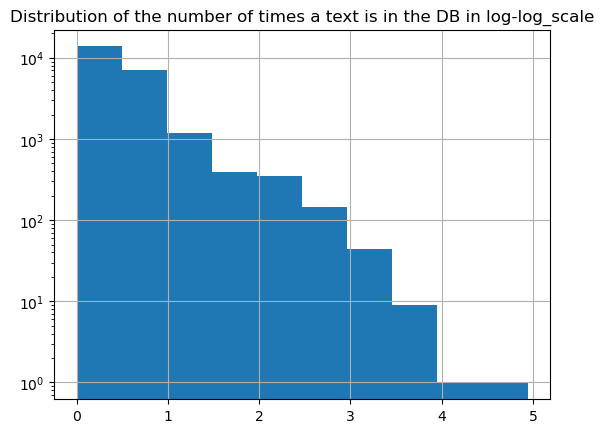

In [8]:
nb_of_duplicated_text = pd.DataFrame(df_cen.groupby('text').size()).reset_index().sort_values(by= 0, ascending = False)
most_freq_text = nb_of_duplicated_text.iloc[0].text
np.log(nb_of_duplicated_text[0]).hist( log = True).set_title("Distribution of the number of times a text is in the DB in log-log_scale")

In [9]:
df_cen[df_cen.text == most_freq_text]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,filter_level,lang,timestamp_ms,linked,display_text_range,withheld_in_countries,extended_entities,possibly_sensitive,retweeted_status,withheld_copyright
494,2021-03-29 12:52:44+00:00,1376517682632220675,1376517682632220672,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-29 12:52:44.658,no,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
495,2021-03-29 12:52:44+00:00,1376517682632220675,1376517682632220672,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-29 12:52:44.658,retweeted,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
21,2021-03-28 09:11:58+00:00,1376099737028472835,1376099737028472832,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 09:11:58.661,no,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
22,2021-03-28 09:11:58+00:00,1376099737028472835,1376099737028472832,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 09:11:58.661,retweeted,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
32,2021-03-28 09:40:08+00:00,1376106825389514752,1376106825389514752,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 09:40:08.658,no,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2021-03-28 04:13:03+00:00,1376024512182026243,1376024512182026240,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 04:13:03.660,retweeted,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
779,2021-03-28 04:50:22+00:00,1376033903245283329,1376033903245283328,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 04:50:22.664,no,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
780,2021-03-28 04:50:22+00:00,1376033903245283329,1376033903245283328,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 04:50:22.664,retweeted,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN
784,2021-03-28 04:30:37+00:00,1376028932978454529,1376028932978454528,RT @EnesKanter: Thanos ? or maybe Jesus 🤔,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,low,en,2021-03-28 04:30:37.660,no,NaN,[TR],NaN,NaN,{'created_at': 'Sat Mar 27 22:09:56 +0000 2021...,NaN


Text(0.5, 1.0, 'Distribution of the number of times a text is in the DB in log-log_scale')

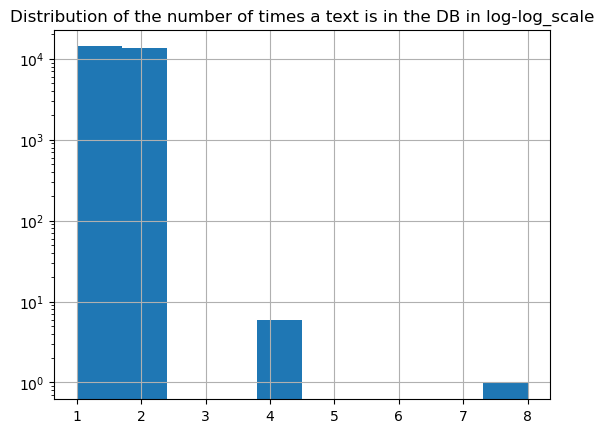

In [10]:
nb_of_duplicated = pd.DataFrame(df_cen.groupby(['timestamp_ms','created_at','text']).size()).reset_index().sort_values(by= 0, ascending = False)
nb_of_duplicated[0].hist( log = True).set_title("Distribution of the number of times a text is in the DB in log-log_scale")

In [11]:
df_cen.iloc[2:4]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,filter_level,lang,timestamp_ms,linked,display_text_range,withheld_in_countries,extended_entities,possibly_sensitive,retweeted_status,withheld_copyright
3,2021-02-26 10:45:51+00:00,1365251727574900738,1365251727574900736,RT @ZaidZamanHamid: لوگوں کی اکثریت ہدایت نہیں...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,low,ur,2021-02-26 10:45:51.661,retweeted,NaN,[IN],NaN,NaN,{'created_at': 'Thu Feb 25 18:59:12 +0000 2021...,NaN
4,2021-02-26 10:38:57+00:00,1365249991137251328,1365249991137251328,RT @SaniaNishtar: سید ابراہیم کا تعلق قبائلی ض...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,low,ur,2021-02-26 10:38:57.662,no,NaN,[IN],NaN,NaN,{'created_at': 'Fri Feb 26 05:23:00 +0000 2021...,NaN


In [ ]:
df_cen_wo_duplicated = df_cen[['timestamp_ms','text']].drop_duplicates(keep='first')

duplicates = df_cen[['text']].duplicated(keep='first')
df_cen_unique_text = df_cen[~duplicates]

In [13]:
len(df_cen_wo_duplicated), len(df_cen_unique_text)

(27960, 23081)

In [ ]:
df_cen = df_cen_unique_text

## Get insight where tweets are withhelded
We have tweets that are withhelded only from 7 countries that are Brazil, France, Germany, Israel, India, Russian Federation and Turkey


### Tweets withhelded in many countries
We had a country `whcs` that has the withhelded countries in `String`. 

We see that most of the tweets have only one country where it is withhelded. 

More over for tweet that are withhelded in 2 countries, there are only for pairs
- France, German
- German, Russia
- Brazil, XX 

where XX seems an undefined country. Maybe we will have to remove this country to make the analysis on Brazil.

In [15]:
df_cen['whcs'] = df_cen.withheld_in_countries.apply(lambda l : [get_name_country(c) for c in l]).apply(lambda x : ', '.join(x))

In [16]:
groups = df_cen.groupby('whcs').apply(len).index
countries = [x for x in list(df_cen.groupby('whcs').apply(len).index)  if ',' not in x]

<AxesSubplot:>

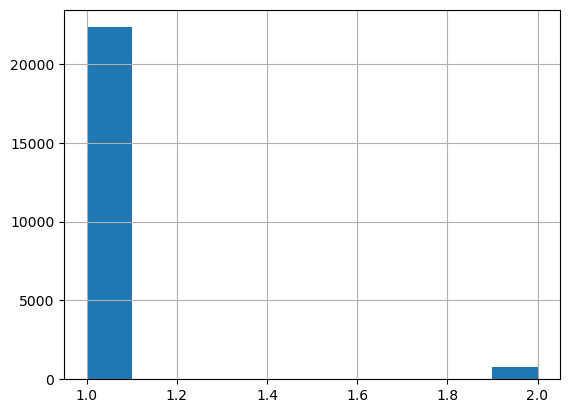

In [17]:
withheld_in_countries = df_cen[['text','withheld_in_countries']].copy()
withheld_in_countries['withheld_in_countries'] = withheld_in_countries['withheld_in_countries'].apply(list)
withheld_in_countries['nb_withheld_countries'] = withheld_in_countries['withheld_in_countries'].apply(len)
withheld_in_countries['nb_withheld_countries'].hist()

In [18]:
withheld_in_2_countries = withheld_in_countries[withheld_in_countries['nb_withheld_countries'] == 2].withheld_in_countries.apply(lambda l : [get_name_country(c) for c in l])
withheld_in_2_countries_count = withheld_in_2_countries.groupby(withheld_in_2_countries.apply(str)).apply(len)
withheld_in_2_countries_count

withheld_in_countries
['Brazil', 'Undefined']               33
['Germany', 'France']                675
['Germany', 'Russian Federation']     53
Name: withheld_in_countries, dtype: int64

## Look at XX country

In [19]:
language_of_XX = pd.DataFrame(df_cen[df_cen.withheld_in_countries.apply(lambda x : 'XX' in x)].groupby('lang').apply(len).sort_values(ascending = False)).reset_index()
language_of_XX['lang'] = language_of_XX['lang'].apply(lambda x : Language.get(x).display_name())
language_of_XX.head()

,lang,0
0,Unknown language,307
1,English,199
2,Portuguese,50
3,Spanish,41
4,Thai,26


In [20]:
df_cen[df_cen.withheld_in_countries.apply(lambda x : 'XX' in x)]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,linked,display_text_range,withheld_in_countries,extended_entities,possibly_sensitive,retweeted_status,withheld_copyright,whcs
127,2021-02-26 18:01:12+00:00,1365361286989574144,1365361286989574144,RT @XimeRobles27: ¿Algún single para esta sema...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,es,2021-02-26 18:01:12.661,no,NaN,[XX],"{'media': [{'id': 1363740312787640321, 'id_str...",0.0,{'created_at': 'Mon Feb 22 06:40:03 +0000 2021...,NaN,Undefined
173,2021-02-26 23:50:54+00:00,1365449291859300355,1365449291859300352,RT @Laylu_0: Mi culito necesito mimitos 🥺🔥\nht...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,es,2021-02-26 23:50:54.657,no,NaN,[XX],"{'media': [{'id': 1365183546139291648, 'id_str...",1.0,{'created_at': 'Fri Feb 26 06:15:02 +0000 2021...,NaN,Undefined
183,2021-02-27 00:39:49+00:00,1365461602166857733,1365461602166857728,1304065527454654018,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,NaN,NaN,...,und,2021-02-27 00:39:49.663,no,NaN,[XX],NaN,NaN,NaN,NaN,Undefined
242,2021-02-26 17:19:39+00:00,1365350830593904642,1365350830593904640,RT @JezabelJadeXXX: ¡El estreno de esta escena...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,en,2021-02-26 17:19:39.662,no,NaN,[XX],NaN,NaN,{'created_at': 'Thu Feb 11 00:15:31 +0000 2021...,NaN,Undefined
251,2021-02-27 02:23:40+00:00,1365487736866672641,1365487736866672640,-77293490440300745,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,NaN,NaN,...,und,2021-02-27 02:23:40.661,no,NaN,[XX],NaN,NaN,NaN,NaN,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2021-02-17 04:23:55+00:00,1361894120126640128,1361894120126640128,-1800196972090638429,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,NaN,NaN,...,und,2021-02-17 04:23:55.664,no,NaN,[XX],NaN,NaN,NaN,NaN,Undefined
368,2021-02-16 07:45:59+00:00,1361582584010956800,1361582584010956800,RT @Rob40029008: করো,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,bn,2021-02-16 07:45:59.666,no,NaN,[XX],NaN,NaN,{'created_at': 'Sat Nov 28 11:44:03 +0000 2020...,NaN,Undefined
477,2021-02-16 13:01:46+00:00,1361662053484810240,1361662053484810240,RT @LolahLeClaire: Become the best boy. \n\nTi...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,en,2021-02-16 13:01:46.665,no,NaN,[XX],"{'media': [{'id': 1361547351526170627, 'id_str...",1.0,{'created_at': 'Tue Feb 16 05:26:11 +0000 2021...,NaN,Undefined
506,2021-02-17 06:40:41+00:00,1361928538581053440,1361928538581053440,RT @SoSTheQueen: Alpha males live a life that ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,en,2021-02-17 06:40:41.663,no,NaN,[XX],NaN,NaN,{'created_at': 'Sat Feb 06 01:48:25 +0000 2021...,NaN,Undefined


## Language
Most of the withhelded tweets are in English, Urdu (language spoken in Pakistan), Turkish.

In [21]:
df_cen['language'] = df_cen['lang'].apply(lambda x : Language.get(x).display_name())
df_cen.groupby('language').apply(len).sort_values(ascending = False).size

50

In [22]:
def group_lower_ranking_values(column):
    lang_counts = df_cen.groupby(column).agg('count')
    pct_value = lang_counts[lambda x: x.columns[0]].quantile(.86)
    values_below_pct_value = lang_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    lang_grouped = df_cen.apply(fix_values, axis=1).groupby(column).agg('count')
    return lang_grouped

In [23]:
group_lower_ranking_values('language').id

language
Arabic               347
English             7984
French               230
German               232
Indonesian           230
Other               1348
Turkish             3875
Unknown language    1627
Urdu                7208
Name: id, dtype: int64

In [24]:
lang_grouped = group_lower_ranking_values('language')
lang_labels = lang_grouped.id.sort_values().index 
lang_counts = lang_grouped.id.sort_values()

In [25]:
lang_counts

language
French               230
Indonesian           230
German               232
Arabic               347
Other               1348
Unknown language    1627
Turkish             3875
Urdu                7208
English             7984
Name: id, dtype: int64

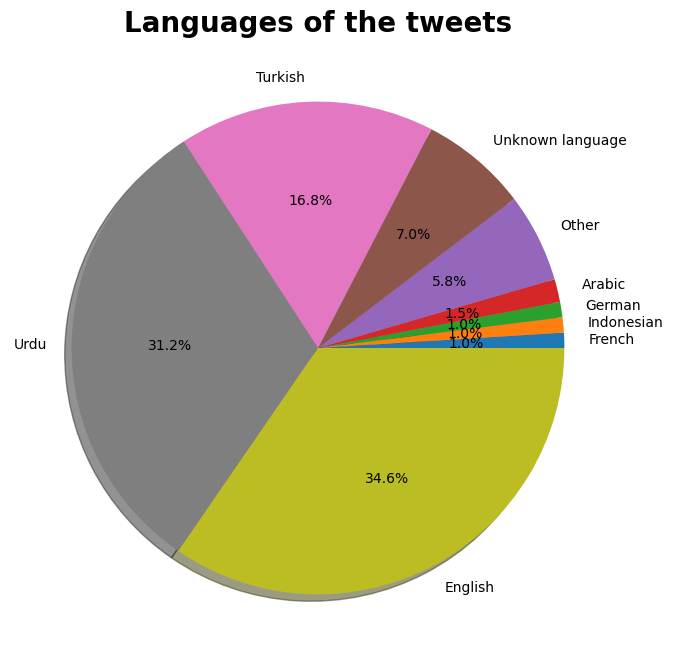

In [26]:
plt.figure(1, figsize=(20,8))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.title(label='Languages of the tweets', fontsize=20, weight='bold')
type_show_ids = plt.pie(lang_counts, labels=lang_labels, autopct='%1.1f%%', shadow=True)
plt.show()

We construct a dataframe that duplicates the tweets that are withhelded in 2 countries so that when grouping by country we get all the tweets that were withhelded in this country independently if the tweets was withhelded in another country. We keep track on those with the `duplicated` feature. This is the `df_cen` extended that is named `df_cen_ext`.

In [27]:
df_cen_ext = flat_withhelded_countries(df_cen, keep_duplicates = True)

In [28]:
lang_repartition_by_whcs = pd.DataFrame(df_cen_ext.groupby(['whcs', 'language']).apply(len).sort_values(ascending = False)).reset_index()

whcs
India                          14182
Turkey                          5433
Germany                         1579
France                           934
Undefined                        901
Russian Federation               757
Germany, France                  675
Germany, Russian Federation       53
Brazil                            44
Brazil, Undefined                 33
Israel                            12
Name: 0, dtype: int64


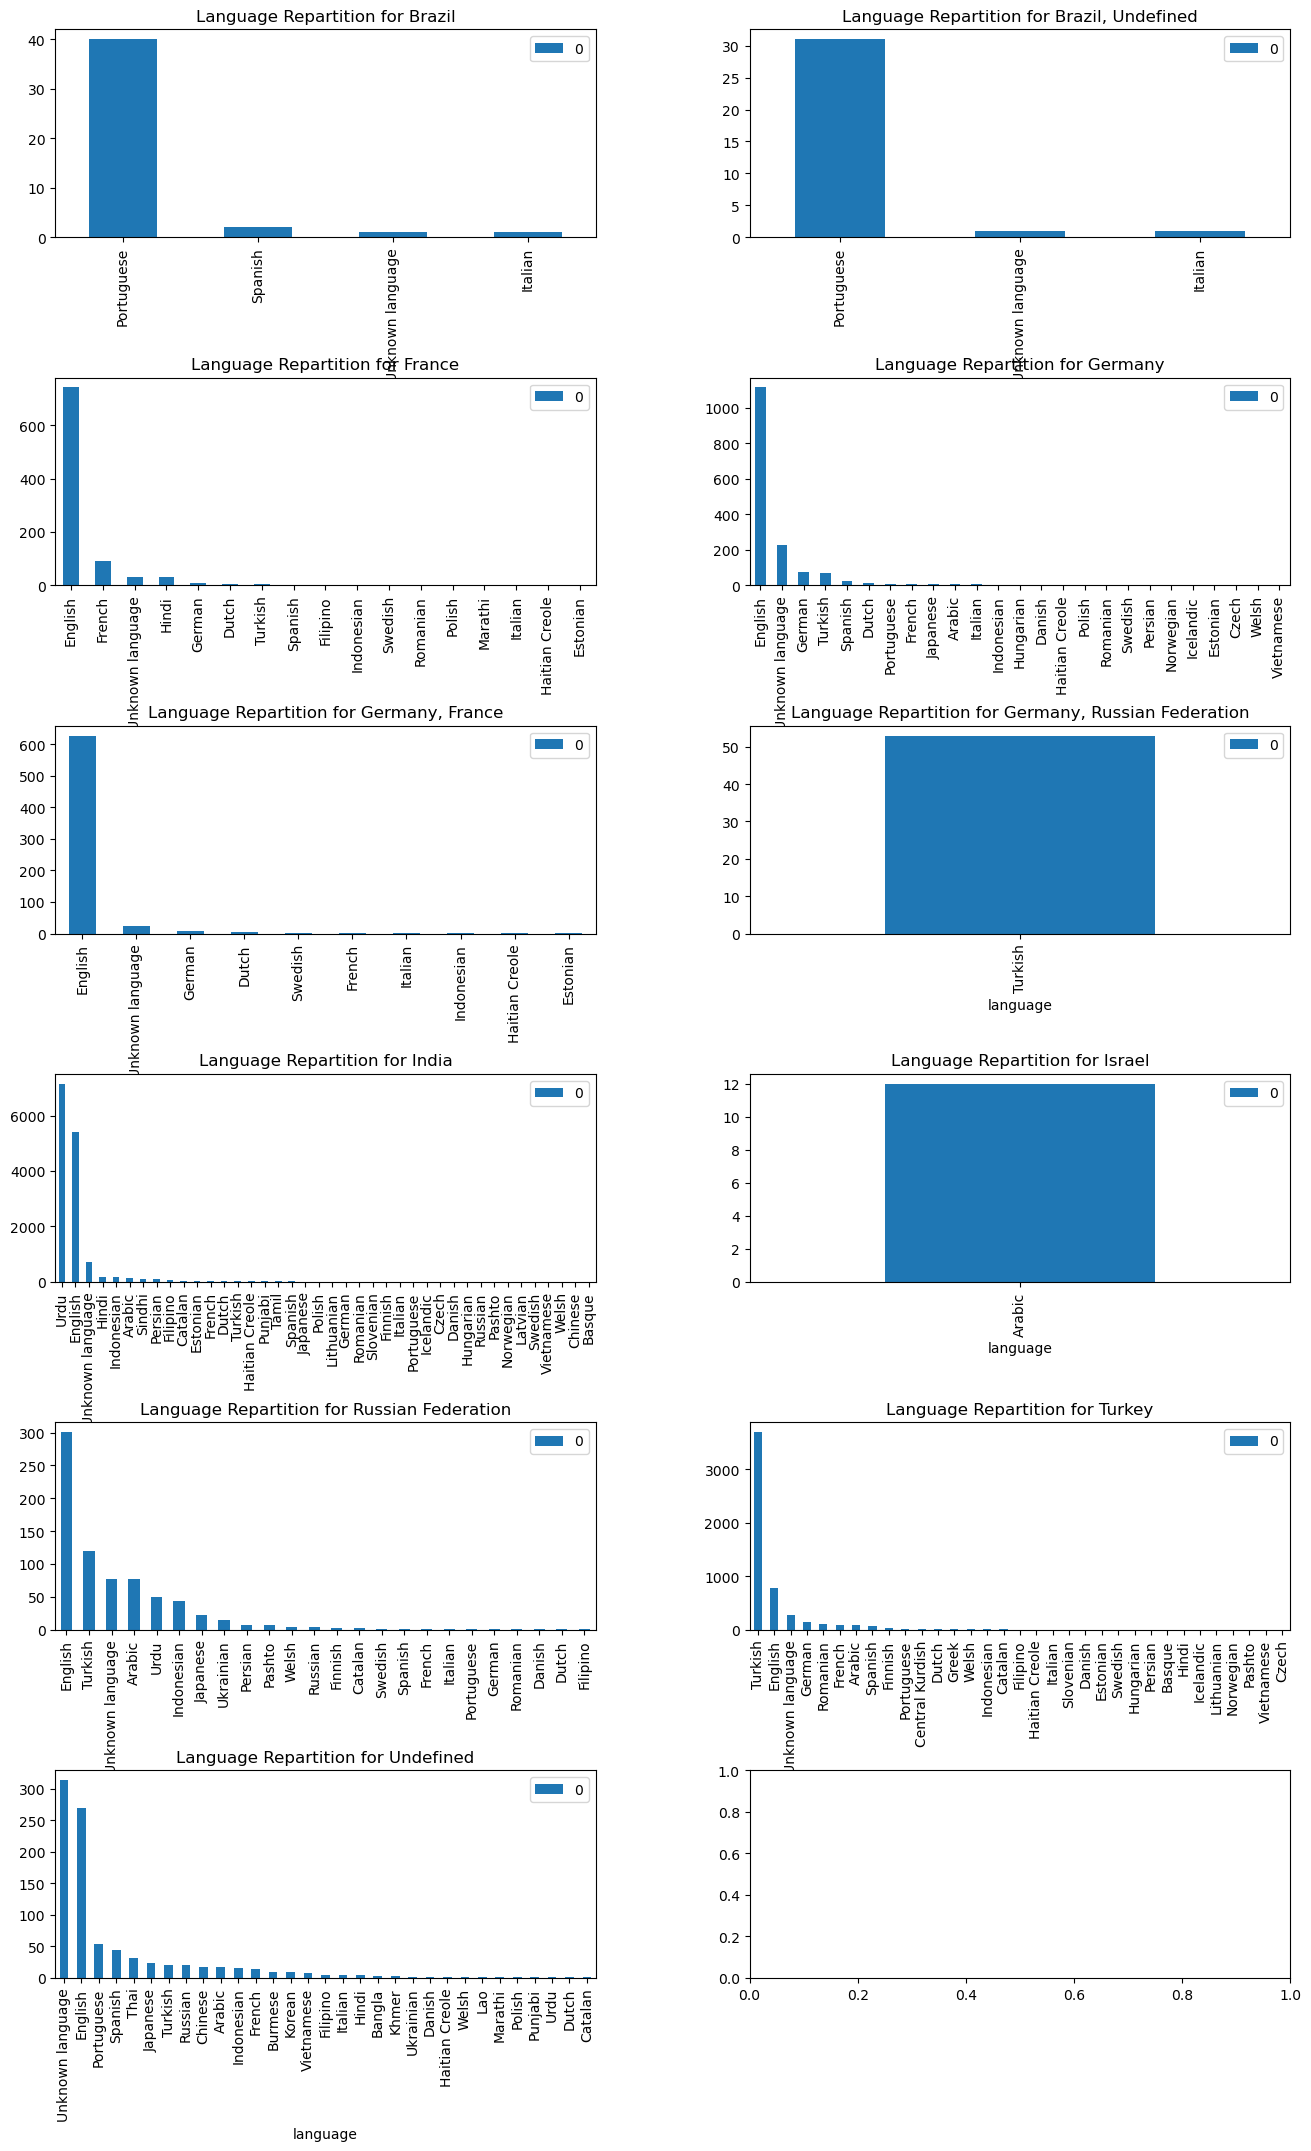

In [29]:
def show_language_repartition_for(country):
    lang_repartition_by_whcs[lang_repartition_by_whcs.whcs == country].plot.bar(x='language', y=0).set_title('Language Repartition for '+str(country))

print(lang_repartition_by_whcs.groupby('whcs')[0].apply(sum).sort_values(ascending = False))
fig, axs = plt.subplots((len(groups)+1)//2, 2, figsize = (15,22))
fig.tight_layout(pad=8.0)
axs = axs.ravel()
for i, country in enumerate(groups):
    lang_repartition_by_whcs[lang_repartition_by_whcs.whcs == country][[ 0, 'language']].plot(x = 'language', y = 0, ax=axs[i], kind='bar').set_title('Language Repartition for '+str(country))

### Check if language is right

After going through all Franch tweets, it seems right.

### Look at undefined language 

Most of them are only http links or only @ 

In [30]:
df_cen[df_cen.language == 'Unknown language']

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,timestamp_ms,linked,display_text_range,withheld_in_countries,extended_entities,possibly_sensitive,retweeted_status,withheld_copyright,whcs,language
12,2021-02-26 10:20:07+00:00,1365245251581976580,1365245251581976576,RT @HTAustralia: #أقيموا_الخلافة\n#ReturnTheKh...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,2021-02-26 10:20:07.664,no,NaN,[RU],NaN,NaN,{'created_at': 'Fri Feb 26 09:43:58 +0000 2021...,NaN,Russian Federation,Unknown language
16,2021-02-26 10:51:37+00:00,1365253178812338176,1365253178812338176,RT @hizbuttahrir: #ReturnTheKhilafah #TimeForI...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,2021-02-26 10:51:37.663,no,NaN,[RU],"{'media': [{'id': 1364893064586747905, 'id_str...",0.0,{'created_at': 'Thu Feb 25 11:00:40 +0000 2021...,NaN,Russian Federation,Unknown language
23,2021-02-26 11:45:16+00:00,1365266680272855044,1365266680272855040,@ap_ka_Bhaiii 💯💯💯😪,"<a href=""http://twitter.com/download/android"" ...",False,1.364940e+18,1.364940e+18,1.153325e+18,1.153325e+18,...,2021-02-26 11:45:16.662,no,"[14, 18]",[IN],NaN,NaN,NaN,NaN,India,Unknown language
59,2021-02-26 09:22:08+00:00,1365230659573325827,1365230659573325824,RT @YpgInt: #ResistAgainstTheInvasion!\n#Riseu...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,2021-02-26 09:22:08.658,no,NaN,[TR],"{'media': [{'id': 1364663173874352130, 'id_str...",0.0,{'created_at': 'Fri Feb 26 08:47:00 +0000 2021...,NaN,Turkey,Unknown language
65,2021-02-26 09:43:58+00:00,1365236154119970818,1365236154119970816,#أقيموا_الخلافة\n#ReturnTheKhilafah\n#YenidenH...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,NaN,NaN,NaN,...,2021-02-26 09:43:58.660,no,"[0, 140]",[RU],NaN,0.0,NaN,NaN,Russian Federation,Unknown language
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2021-02-16 19:48:43+00:00,1361764465788747779,1361764465788747776,RT @AyaIsleemEn: #Jerusalem now https://t.co/V...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,2021-02-16 19:48:43.661,no,NaN,[IN],"{'media': [{'id': 1361740232916414472, 'id_str...",0.0,{'created_at': 'Tue Feb 16 18:15:43 +0000 2021...,NaN,India,Unknown language
558,2021-02-16 19:19:07+00:00,1361757016700690436,1361757016700690432,RT @eyedustcartel: https://t.co/xZsquEgfHJ,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,2021-02-16 19:19:07.660,no,NaN,[DE],"{'media': [{'id': 1361403716100882438, 'id_str...",1.0,{'created_at': 'Mon Feb 15 19:55:40 +0000 2021...,NaN,Germany,Unknown language
599,2021-02-16 21:29:32+00:00,1361789837121105922,1361789837121105920,@anadoluagency https://t.co/Mcj1QOvtYQ,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.361680e+18,1.361680e+18,2.402653e+08,2.402653e+08,...,2021-02-16 21:29:32.658,no,"[14, 14]",[TR],"{'media': [{'id': 1361789829219037191, 'id_str...",0.0,NaN,NaN,Turkey,Unknown language
601,2021-02-16 21:43:27+00:00,1361793339394260998,1361793339394260992,@BinteChinte @Mee__ruU @TurgutAlp96 Yes,"<a href=""http://twitter.com/download/android"" ...",False,1.361780e+18,1.361780e+18,9.121564e+07,9.121564e+07,...,2021-02-16 21:43:27.665,no,"[36, 39]",[IN],NaN,NaN,NaN,NaN,India,Unknown language


In [31]:
pd.options.display.max_colwidth = 200
df_cen[df_cen.language == 'Unknown language'].text.head(30)

12       RT @HTAustralia: #أقيموا_الخلافة\n#ReturnTheKhilafah\n#YenidenHilafet\n#خلافت_کو_قائم_کرو\n#TurudisheniKhilafah\n#EtablerKhilafah\n#УстановитеХал…
16                                                   RT @hizbuttahrir: #ReturnTheKhilafah #TimeForIslam #TimeForKhilafah #HTBritain https://t.co/iSG0PvcopD
23                                                                                                                                       @ap_ka_Bhaiii 💯💯💯😪
59                                        RT @YpgInt: #ResistAgainstTheInvasion!\n#Riseup4Rojava #Kurdistan #TwitterKurds #YPG #YPJ https://t.co/wIJQdl0rz0
65                #أقيموا_الخلافة\n#ReturnTheKhilafah\n#YenidenHilafet\n#خلافت_کو_قائم_کرو\n#TurudisheniKhilafah\n#EtablerKhilafah… https://t.co/SmtZWCm8Ui
104                                                                                              RT @SamaBazgha: #PakRetaliationDay https://t.co/Tfu1BVkujk
108                                                             

## See other features 
We can see that there are 18 features that have a lot of `NaN`. `contributors` is always `NaN` and should be deleted. There is only one entry where `geo` and `coordinates` are not `NaN`  

For countable features (i.e. `quote_count`, `reply_count`, `retweet_count`, `favorite_count`) all values are at $0$. Therefore these columns have no interest for us.

The dates `created at` and `timestamp_ms` seems to be exactly the same except the second one is more precise.  

`possibly_sensitive` takes only values in $\{0,1\}$ and should be transformed in boolean type 

`favorited` and `retweeted` are always `False` and should be deleted

`filter_level` is always `low` and should be deleted

In [32]:
total = len(df_cen)
print("There are %d tweets"%(total))
for col in df_cen.columns :
    nb_na = df_cen[col].isna().sum()
    if nb_na > 0 :
        print("Column %25s has in total %5d entries that are NaN "%(col, nb_na))


There are 23081 tweets
Column     in_reply_to_status_id has in total 22034 entries that are NaN 
Column in_reply_to_status_id_str has in total 22034 entries that are NaN 
Column       in_reply_to_user_id has in total 22006 entries that are NaN 
Column   in_reply_to_user_id_str has in total 22006 entries that are NaN 
Column   in_reply_to_screen_name has in total 22006 entries that are NaN 
Column                       geo has in total 23080 entries that are NaN 
Column               coordinates has in total 23080 entries that are NaN 
Column                     place has in total 23045 entries that are NaN 
Column              contributors has in total 23081 entries that are NaN 
Column          quoted_status_id has in total 21150 entries that are NaN 
Column      quoted_status_id_str has in total 21150 entries that are NaN 
Column             quoted_status has in total 21156 entries that are NaN 
Column   quoted_status_permalink has in total 21156 entries that are NaN 
Column         

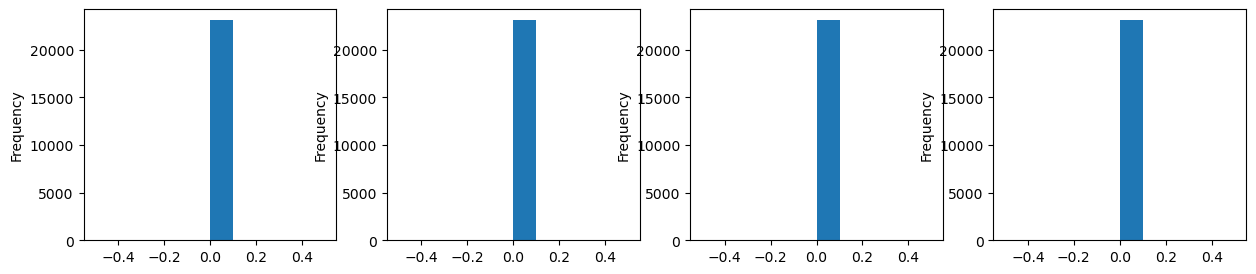

In [33]:
fig, axs = plt.subplots(1, 4, figsize = (15,3))
axs = axs.ravel()
for i, f in enumerate(features_count):
    df_cen[f].plot(ax = axs[i], kind = 'hist')

,created_at,timestamp_ms
1,2021-02-26 10:48:35+00:00,2021-02-26 10:48:35.662
2,2021-02-26 10:45:51+00:00,2021-02-26 10:45:51.661
4,2021-02-26 10:38:57+00:00,2021-02-26 10:38:57.662
5,2021-02-26 10:10:45+00:00,2021-02-26 10:10:45.659
7,2021-02-26 10:10:46+00:00,2021-02-26 10:10:46.662
...,...,...
627,2021-02-17 05:00:37+00:00,2021-02-17 05:00:37.664
628,2021-02-17 05:58:24+00:00,2021-02-17 05:58:24.663
630,2021-02-17 05:36:57+00:00,2021-02-17 05:36:57.663
639,2021-02-17 05:51:46+00:00,2021-02-17 05:51:46.666


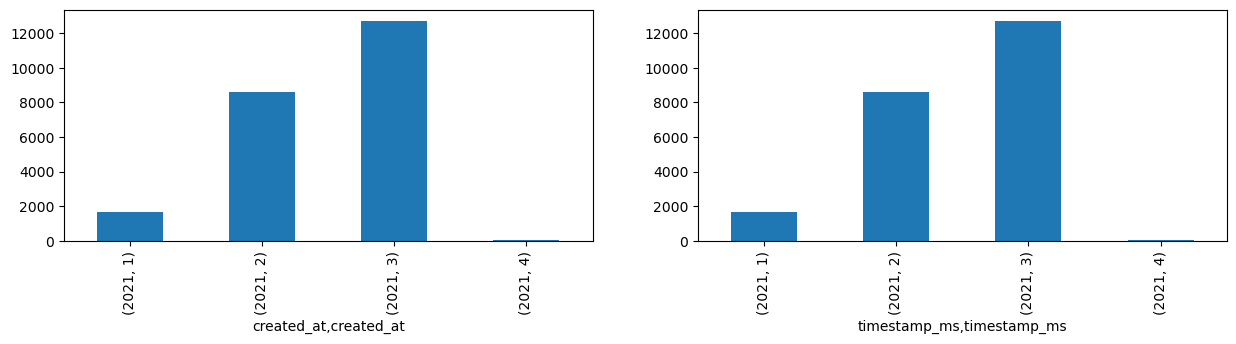

In [34]:
fig, axs = plt.subplots(1, 2, figsize = (15,3))
axs = axs.ravel()
df_cen.created_at.groupby([df_cen["created_at"].dt.year, df_cen["created_at"].dt.month]).count().plot(ax = axs[0], kind="bar")
df_cen.created_at.groupby([df_cen["timestamp_ms"].dt.year, df_cen["timestamp_ms"].dt.month]).count().plot(ax = axs[1], kind="bar")
df_cen[['created_at', 'timestamp_ms']]

In [35]:
for feat in features_bool :
    print(df_cen.groupby(feat).apply(len), '\n')

truncated
False    22063
True      1018
dtype: int64 

is_quote_status
False    21148
True      1933
dtype: int64 

favorited
False    23081
dtype: int64 

retweeted
False    23081
dtype: int64 



In [36]:
print(df_cen.groupby('possibly_sensitive').apply(len), '\n')
df_cen[df_cen.possibly_sensitive.notna()][['possibly_sensitive', 'withheld_in_countries', 'text' ]]

possibly_sensitive
0.0    4785
1.0     817
dtype: int64 



,possibly_sensitive,withheld_in_countries,text
1,0.0,[IN],#Balakot \nPak Army is our pride ❤️👍 https://t.co/JirGPSMMGO
7,0.0,[IN],RT @Saimhun: Mujhe aj bhi batting ki bari ni di😔\n Yahin so jata hun! Subha jb sab ayenge pehle pehle me kheilunga🤔🤔😁 https://t.co/0PjHxburfB
14,0.0,[TR],RT @MAturkce: Mardin'de tecrit protestosu\nhttps://t.co/L74mdHmUz1 https://t.co/n1Ok6Gix46
16,0.0,[RU],RT @hizbuttahrir: #ReturnTheKhilafah #TimeForIslam #TimeForKhilafah #HTBritain https://t.co/iSG0PvcopD
22,0.0,[TR],@mferho1 Mamoste Medenî têkoşerekî li ser rêya heqîqetê ye. Mîna Rustemê Zal ê kalbûyî ye. Kelemê çavê neyaran e.… https://t.co/hNJ2SdvsNn
...,...,...,...
599,0.0,[TR],@anadoluagency https://t.co/Mcj1QOvtYQ
602,0.0,[XY],RT @goals557: Ba rca x P S G🔥\n\nKindly retweet and follow @mrfc100 to enjoy all games \n\nRetweet before watching 🌹\n https://t.co/iWe1ZucqSn
618,1.0,[XX],RT @kittyAnanya: 🎥 5 https://t.co/niatwvhUJw
628,0.0,[TR],"RT @YakaranGonuller: ""Her zaman demeye çalışıyorum da bugünlerde daha çok söylemek içimden geldi."" https://t.co/iT6HnOX3xq"


## Users

In [37]:
df_cen.iloc[0].user

{'id': 966615015716458497,
 'id_str': '966615015716458497',
 'name': 'ميرذكی منصوری 🇵🇰🇹🇷',
 'screen_name': 'hafizmirzaki',
 'location': None,
 'url': None,
 'description': '\u200fہم حسِین ترین امیر ترین ذہین ترین اور زندگی میں ہر حوالے سے بہترین ہوکر بھی, بالآخر مر ہی جائیں گے 💔💯',
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 93,
 'friends_count': 192,
 'listed_count': 0,
 'favourites_count': 3038,
 'statuses_count': 1631,
 'created_at': 'Thu Feb 22 10:05:53 +0000 2018',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': '',
 'profile_background_image_url_https': '',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_sidebar_border_color': 'C0DEED',
 'profile_sidebar_fill_color': 'DDEEF6',
 'profile_text_color': '333333',
 'profile_use_background_image': True,
 

In [38]:
df_cen['user_name'] = df_cen.apply(lambda x : x.user['name'], axis = 1)
df_cen.groupby('user_name').apply(len).sort_values(ascending = False)

user_name
🇵🇱LaureenPink ™©ONLYFANS-Girl🇵🇱    361
افضال احمد                         299
Maqbool Ahmad                      231
Murteza Haçkalı 1461               227
Muhammad nawaz sunpal              188
                                  ... 
Maica                                1
Mah❤️ LARAIB❤️ KA janam Din ❤️       1
Mah❤️                                1
Mahwash                              1
🦴 زندہ_لاش 👀                         1
Length: 7200, dtype: int64

<AxesSubplot:>

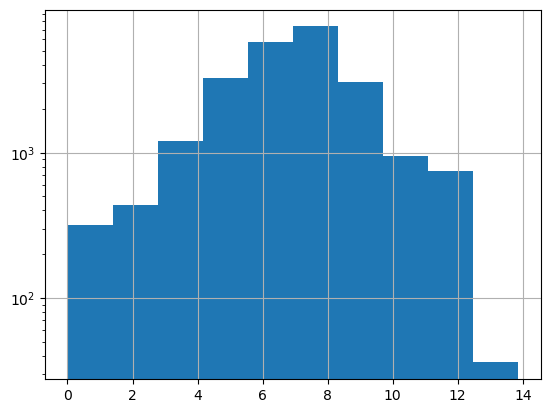

In [39]:
df_cen.user.apply(lambda x : np.log(x['followers_count']+1)).hist(log = True)

In [40]:
df_cen.groupby('filter_level').apply(len)

filter_level
low    23081
dtype: int64

In [41]:
df_cen.iloc[0].extended_entities

{'media': [{'id': 1365252409015033857,
   'id_str': '1365252409015033857',
   'indices': [36, 59],
   'media_url': 'http://pbs.twimg.com/media/EvJZ1SQWYAEW5qu.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/EvJZ1SQWYAEW5qu.jpg',
   'url': 'https://t.co/JirGPSMMGO',
   'display_url': 'pic.twitter.com/JirGPSMMGO',
   'expanded_url': 'https://twitter.com/hafizmirzaki/status/1365252415444946945/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 680, 'h': 636, 'resize': 'fit'},
    'large': {'w': 720, 'h': 673, 'resize': 'fit'},
    'medium': {'w': 720, 'h': 673, 'resize': 'fit'}}}]}

In [42]:
for feat in features_quoted :
    print(feat, df_cen[df_cen[feat].notna()].iloc[0][feat], '\n')

quoted_status_id 1.3645356779965194e+18 

quoted_status_id_str 1.3645356779965194e+18 

quoted_status {'created_at': 'Wed Feb 24 11:20:32 +0000 2021', 'id': 1364535677996519427, 'id_str': '1364535677996519427', 'text': 'GREAT NEWS FOR THE CHILDREN OF PAKISTAN...School mein maar khane ke din gaye! Ab koi aap ko thappar nahi maar sakta… https://t.co/1nDIbkTXGD', 'display_text_range': [0, 140], 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 50386039, 'id_str': '50386039', 'name': 'Shehzad Roy', 'screen_name': 'ShehzadRoy', 'location': 'karachi, Pakistan', 'url': 'http://Www.Instagram.com/officialshehzadroy', 'description': 'UNODC Goodwill Ambassador... Some days I am a musician and singer but everyday I fight for a better Pakistan by trying to chang

### IDs 

It seems that ID and IS_STR are not always the same 

In [43]:
len(df_cen[df_cen['id']!=df_cen['id_str']])

17601

## Conlusion 

We remove the unnecessary columns and change the type of `possibly_sensitive`. 

We finally save the edaprocessed df in memory

In [ ]:
df_final = eda_processing(df_cen)

## Look at truncate tweets  

In [ ]:
df_cen[df_cen.truncated].withheld_in_countries.apply(lambda x : str(x)).value_counts()

In [ ]:
pd.options.display.max_colwidth = 200
truncated_idx = [7,10,11,18]
df_cen.text.iloc[truncated_idx]

In [ ]:
df_cen.iloc[truncated_idx][['truncated','extended_tweet']]

In [ ]:
df_cen[df_cen.lang == 'en']